# 16 Ανάλυση δεδομένων με την βιβλιοθήκη pandas ΙI 

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το μάθημα θα κάνουμε μια εισαγωγή για την διαχείριση δεδομένων με `pandas`. Πιο συγκεκριμένα θα δούμε:
    
- φιλτράρισμα δεδομένων
    
- επισκόπηση αρχείου
    
- επεξεργασία μη-έγγυρων και κενών εγγραφών
    
- οπτικοποίηση δεδομένων.    
    
Όλα τα παραπάνω αποτελούν μέρος της επεξεργασίας και ανάλυσης δεδομένων.    
    
</div>

- - - 

## 16.1 Φιλτράρισμα δεδομένων

Το φιλτράρισμα των δεδομένων αποτελεί ένα πολύ βασικό βήμα στη διαδικασία της ανάλυσης δεδομένων καθώς μας επιτρέπει να διαχωρίσουμε τα δεδομένα που μας ενδιαφέρουν από εκείνα που μας είναι αχρείαστα.

Το φιλτράρισμα βασίζεται στην αρχή ότι όταν κάνουμε συγκρίσεις χρησιμοποιώντας το DataFrame, αυτό που θα πάρουμε πίσω είναι ένα **αντικείμενο Series που περιέχει λογικές τιμές**. Οι τιμές του αντικειμένου Series αντιστοιχούν στις θέσεις όπου η συνθήκη είναι αληθής/ψευδής αντίστοιχα και μπορεί να λειτουργήσει ως μάσκα για τα δεδομένα μας, ακριβώς όπως είδαμε και στην περίπτωση της βιβλιοθήκης ``numpy``. 

Για παράδειγμα, ας ξαναδούμε το DataFrame με το οποίο δουλέψαμε και στο προηγούμενο μάθημα. 

In [2]:
# in case you get warnings, you can surpress them with this
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd

students = {
    "first_name": ["Maria", "Kostas", "Nikos"],
    "last_name": ["Maraki", "Kostakis", "Nikakis"],
    "email": ["maraki@physics.uoc.gr", "kostakis@physics.uoc.gr", "nikakis@physics.uoc.gr"],
    "code": ['ph9900', 'ph9902', 'ph9906'],
    "thesis_field": ["Astrophysics", "Quantum Mechanics", "Atomic Physics"],
    "working hours per day": [5,7,6]
}


df = pd.DataFrame(students)
df

,first_name,last_name,email,code,thesis_field,working hours per day
0,Maria,Maraki,maraki@physics.uoc.gr,ph9900,Astrophysics,5
1,Kostas,Kostakis,kostakis@physics.uoc.gr,ph9902,Quantum Mechanics,7
2,Nikos,Nikakis,nikakis@physics.uoc.gr,ph9906,Atomic Physics,6


#### Προσθήκη Data Frames

Ένας πιο γενικός και αποτελεσματικός τρόπος για την προσθήκη νέων σειρών (εγγραφών) είναι μέσω του [`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html), και το οποίο μπορεί να ενώσει δύο Data Frames (επιλέγοντας το `axis` αυτό μπορεί να γίνει είτε στο επίπεδο των γραμμών είτε των στηλών).

In [3]:
# Creating the dictionary of new entries to be added
new_students = {
    'code': ['ph9921', 'ph9922', 'ph9928'],
    'first_name': ['Korina', 'Manos', 'Eleni'], 
    'last_name': ['Korinaki', 'Manakis', 'Elenaki'], 
    'email': ['korinaki@email.com', 'manakis@email.com', 'elenaki@email.com'], 
    'thesis_field': ['Atomic Physics', 'Astrophysics', 'Atomic Physics']
    }

# Parsing them to the DF
df2 = pd.DataFrame(new_students)
df2

,code,first_name,last_name,email,thesis_field
0,ph9921,Korina,Korinaki,korinaki@email.com,Atomic Physics
1,ph9922,Manos,Manakis,manakis@email.com,Astrophysics
2,ph9928,Eleni,Elenaki,elenaki@email.com,Atomic Physics


In [4]:
# Concatenating the two data frames
df3 = df.append(df2)
df3

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
0,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
1,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
2,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


**Παρατήρηση 1η**: Αν προσέξουμε το `index`θα δείτε ότι χρησιμοποιήθηκαν οι δείκτες των αρχικών data frames (by default). Αυτό δεν είναι ιδανικό αν θέλουμε να έχει νόημα αυτός ο δείκτης. Για το πετύχουμε αυτό τότε επιλέγουμε `ignore_index=True`.

In [5]:
df3 = df.append(df2, ignore_index=True)
df3

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


**Παρατήρηση 2η**: 

Η στήλη "working hours per day" που δεν υπήρχε στο δεύτερο DataFrame συμπληρώθηκαν με κενές τιμές. Το κενό αναπαρίσταται ως ``NaN`` (Not a Number) και ανήκει στην κλάση float, έτσι ώστε να μην δημιουργείται πρόβλημα με τις αριθμητικές πράξεις (και να συνεχίζει ο υπολογισμός τους σαν να μην υπήρχαν).

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
&#9755; Η τιμή ``NaN`` **δεν ισούται** με καμία τιμή, ακόμα και με τον εαυτό της (στάνταρντ της ΙΕΕΕ). Άρα σε μια λογική σύγκριση της μορφής ``x == np.nan`` θα επιστρέψει ``False`` ακόμα κι αν ισχύει ότι η τιμή του ``x`` να είναι ``NaN``.
     
</div>

Για την ώρα ας υποθέσουμε ότι θέλουμε να εμφανίσουμε όλους τους φοιτητές που έχουν πεδίο μελέτης "Atomic Physics".

In [6]:
df3["thesis_field"] == "Atomic Physics"

0    False
1    False
2     True
3     True
4    False
5     True
Name: thesis_field, dtype: bool

Ας φτιάξουμε μια μάσκα τώρα από αυτή την επιλογή και ας την εφαρμόσουμε στα δεδομένα μας.

In [9]:
mask = (df3["thesis_field"] == "Atomic Physics")
df3[mask]

,code,email,first_name,last_name,thesis_field,working hours per day
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


In [8]:
# equivalent to:
df3[df3["thesis_field"] == "Atomic Physics"]

,code,email,first_name,last_name,thesis_field,working hours per day
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


Αν θέλουμε να εμφανίσουμε μόνο μια συγκεκριμένη στήλη για όσους φοιτητές έχουν αυτή την επιλογή πεδίου, τότε μπορούμε πολύ απλά να χρησιμοποιήσουμε τους δείκτες `.loc` μαζί με την αντίστοιχη στήλη.

Σε αυτή την περίπτωση, η μάσκα εφαρμόζεται πάνω στις γραμμές και κρατάμε αυτές που αντιστοιχούν στη ζητούμενη στήλη.

In [20]:
df3.loc[mask, "code"]

2    ph9906
3    ph9921
5    ph9928
Name: code, dtype: object

Μπορούμε να χρησιμοποιήσουμε και το `.iloc`, αλλά σε αυτή την περίπτωση θα πρέπει πρώτα να προσδιορίσουμε τις γραμμές που επιλέγουμε.

In [21]:
import numpy as np

# fing row indeces where the mask is True
row_idx = np.where(mask)[0]
print(row_idx)

# provide them inside .iloc, along with the column index
df3.iloc[row_idx, 0]

[2 3 5]


2    ph9906
3    ph9921
5    ph9928
Name: code, dtype: object

Μπορούμε να φιλτράρουμε τιμές και με βάση μια αριθμητική σχέση, δηλαδή να επιλέξουμε πχ όσες γραμμές έχουνώρες εργασίες μεγαλύτερες ή μικρότερες μιας τιμής.

In [22]:
df3[df3["working hours per day"] >= 6]

,code,email,first_name,last_name,thesis_field,working hours per day
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0


Φυσικά μπορούμε να κατασκευάσουμε και πιο σύνθετα φίλτρα χρησιμοποιώντας τους τελεστές ``&`` (and),  ``|`` (or) και ``~`` (not) όπως έχουμε δει.

In [23]:
# Filter those with thesis ield either Astrophysics or Statistics
filt = (df3["thesis_field"] == "Astrophysics") | ((df["thesis_field"] == "Quantum Mechanics"))
df3[filt]

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN


Πολύ βολικά και εύκολα μπορούμε να πάρουμε την αντιστροφή:

In [24]:
# Show the rest of them
df3[~filt]

,code,email,first_name,last_name,thesis_field,working hours per day
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


In [27]:
# Show the selected ones with specific columns
df3.loc[filt, ["code", "thesis_field", "working hours per day"]]

,code,thesis_field,working hours per day
0,ph9900,Astrophysics,5.0
1,ph9902,Quantum Mechanics,7.0
4,ph9922,Astrophysics,NaN


Και με ένα ακόμη βήμα επιλογής...

In [35]:
seldf = df3.loc[filt, ["code", "thesis_field", "working hours per day"]]

# selecting those rows further based on a numeric selection
seldf[seldf["working hours per day"]>5]

,code,thesis_field,working hours per day
1,ph9902,Quantum Mechanics,7.0


<div class="alert alert-block alert-info" style="margin-top: 20px">
    
&#9755; **Word of Caution !**

Στα παραπάνω παραδείγματα (και αυτά που ακολουθούν) θα δείτε ότι επιδρούμε κατευθείαν πάνω στο αρχικό df, και από το οποίο παράγουμε καινούργια υποσύνολά του. Υπάρχει περίπτωση όμως αυτές οι πράξεις να επηρεάσουν το αρχικό (να είναι εικόνες του). Έτσι αν θέλουμε να εγγυηθούμε ότι δεν πειράζουμε το αρχικό df η καλύτερη πρακτική είναι να κάνουμε πάντα ένα αντίγραφο (`.copy()`). Οπότε στο παραπάνω παράδειγμα θα θέταμε: seldf = df3.loc[...].copy().
    
</div>    

## 16.2 Ανάλυση δεδομένων

### 16.2.1 Επισκόπηση δεδομένων

Έχοντας τα δεδομένα μας η πρώτη μας προσέγγιση θα πρέπει να είναι να διερευνήσουμε τι είναι αυτά. Συνολικά μπορούμε να χρησιμοποιήσουμε την μέθοδο `.info()`.

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
code                     6 non-null object
email                    6 non-null object
first_name               6 non-null object
last_name                6 non-null object
thesis_field             6 non-null object
working hours per day    3 non-null float64
dtypes: float64(1), object(5)
memory usage: 416.0+ bytes


Η μέθοδος μας δίνει περισσότερες πληροφορίες σχετικά με το αρχείο των δεδομένων. Εκτός του αριθμού των στηλών/γραμμών, μας δείχνει και τον τύπο των δεδομένων που έχει κάθε στήλη καθώς και το αν περιέχουν κενές τιμές. Η τιμή 'non-null' δείχνει πόσες μη-κενές τιμές υπάρχουν σε κάθε στήλη (διαφορετικά πόσες ΝaN τιμές υπάρχουν). Η `pandas` προσπαθεί να μετατρέψει κάθε στήλη σε αριθμητικές τιμές (για αυτό και η 'working hours per day' χαρακτηρίζεται από float64), αλλά όταν δεν πετυχαίνει (δηλαδή περιέχει και συμβολοσειρές) τότε επιστρέφει object. 

Μπορούμε να πάρουμε τις πρώτες/τελευταίες γραμμές ενός df με τις μεθόδους `.head()` και `.tail()` όπου μέσα στις παρενθέσεις βάζουμε τις γραμμές που θέλουμε να δούμε.

In [46]:
#Returns the first 3 rows of our DataFrame
df3.head(3)

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0


In [47]:
#Returns the last 3 rows of our DataFrame
df3.tail(2)

,code,email,first_name,last_name,thesis_field,working hours per day
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


### 16.2.2 Ταξινόμηση

Μπορούμε να ταξινομήσουμε το Data Frame μας με βάση τις τιμές μια στήλης ή με βάση τους δείκτες (αν χρησιμοποιούμε τους αρχικούς δέικτες ενός Data Frame αυτό δεν κάνει κάποια διαφορά φυσικά).

In [48]:
df3.sort_index

<bound method DataFrame.sort_index of      code                    email first_name last_name       thesis_field  \
0  ph9900    maraki@physics.uoc.gr      Maria    Maraki       Astrophysics   
1  ph9902  kostakis@physics.uoc.gr     Kostas  Kostakis  Quantum Mechanics   
2  ph9906   nikakis@physics.uoc.gr      Nikos   Nikakis     Atomic Physics   
3  ph9921       korinaki@email.com     Korina  Korinaki     Atomic Physics   
4  ph9922        manakis@email.com      Manos   Manakis       Astrophysics   
5  ph9928        elenaki@email.com      Eleni   Elenaki     Atomic Physics   

   working hours per day  
0                    5.0  
1                    7.0  
2                    6.0  
3                    NaN  
4                    NaN  
5                    NaN  >

In [49]:
df3.sort_values('working hours per day')

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


### 16.2.3 Ομαδοποίηση και στατιστικά

Μπορούμε επίσης να πάρουμε γρήγορα στατιστικά για τις στήλες μας (πχ `.mean()`, `.sum()`, `.count()`, `.min()`, `.max()`). Αυτό μπορεί να εφαρμοστεί εύκολα πάνω σε οποιαδήποτε στήλη, αλλά μπορούμε και να ομαδοποιήσουμε αποτελέσματα με βάση τις τιμές κάποιας. 

In [50]:
print('mean: ', df3['working hours per day'].mean())
print('sum: ', df3['working hours per day'].sum())
print('count: ', df3['working hours per day'].count())
print('min: ', df3['working hours per day'].min())
print('max: ', df3['working hours per day'].max())

mean:  6.0
sum:  18.0
count:  3
min:  5.0
max:  7.0


Η μέθοδος `.groupby` μπορεί να ομαδοποιήσει ανάλογα με την τιμή που έχει μια στήλη, αλλά χρειάζεται μια μέθοδο να εφαρμοστεί πάνω της ώστε να επιστρέψει κάτι.

In [51]:
# grouping based on a column and output based on a statistic
df3.groupby('thesis_field').count()

,code,email,first_name,last_name,working hours per day
thesis_field,,,,,
Astrophysics,2,2,2,2,1
Atomic Physics,3,3,3,3,1
Quantum Mechanics,1,1,1,1,1


Φυσικά όλα τα παραπάνω μπορούν να συνδυαστούν με όποια φίλτρα επιθυμούμε. 

In [56]:
filt2 = df3["thesis_field"] == "Atomic Physics" 
print(df3.loc[filt2, ["first_name", "code", "working hours per day"]].count())

print('='*30)
print(df3.loc[filt2, ["first_name", "code", "working hours per day"]].mean())

first_name               3
code                     3
working hours per day    1
dtype: int64
working hours per day    6.0
dtype: float64


### 16.2.3 Επισκόπηση ενός πραγματικού συνόλου δεδομένων

Ας δοκιμάσουμε ότι μάθαμε και σε ένα πραγματικό σύνολο δεδομένων που αφορά αξίες κατοικιών στην Καλιφόρνια των Η.Π.Α. Τα δεδομένα προέρχονται από την ακαδημαϊκή εργασία των Pace, R. Kelley και Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297. Αρχικά, θα διαβάσουμε τα δεδομένα και θα εξετάσουμε τι είναι. 

In [123]:
import pandas as pd
data = pd.read_csv('data_files/california_housing.csv')
data.shape

(20640, 9)

Βλέπουμε ότι το αρχείο μας αποτελείται από 9 στήλες και 20640 γραμμές. Ας δούμε τις 10 πρώτες γραμμές.

In [124]:
data.head(10)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,NaN,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,NaN,707.0,1551.0,714.0,3.6912,261100.0


<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 16.1</b>
    
Με ποιά εντολή θα πέρνατε μια σύνοψη του αρχείου; Τι σας λέει αυτό;

</div>

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Απάντηση</summary></b>
    
```python 
data.info()
```
Παρατηρούμε ότι υπάρχουν κενές εγγραφές σε όλες τις στήλες του αρχείου, οπότε τα δεδομένα μας δεν είναι πλήρη. Επίσης, το γεγονός ότι ο τύπος των δεδομένων σε μερικές στήλες είναι object σημαίνει ότι οι συγκεκριμένες στήλες (που αντιστοιχούν σε πραγματικές τιμές)  περιέχουν κάποια συμβολοσειρά που δεν επέτρεψε την μετατροπή τους σε αριθμητικές τιμές.

Δυστυχώς, αυτός είναι ο κανόνας της πραγματικότητας και τις περισσότερες φορές στα δεδομένα που έχουμε στη διάθεσή μας υπάρχουν κενά ή μη-έγκυρες τιμές.

Γι' αυτό το λόγο, είναι απαραίτητο, πριν ξεκινήσουμε να αναλύουμε τα δεδομένα μας να εκτελέσουμε ένα στάδιο προ-επεξεργασίας των δεδομένων ώστε να τα φέρουμε σε μια επιθυμητή μορφή.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 16.2</b>
    
Ταξινομήστε το Data Frame με βάση την στήλη του πληθυσμού. Στην συνέχεια βρείτε την ελάχιστη, μεγαλύτερη, και μεσαία τιμή.
    
</div>

In [ ]:
# You can try it here
# If you are struggling you can click on details below for the solution

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση</summary></b>
    
```python 
data.sort_values(by='population')
print('min: ', data['population'].min())
print('max: ', data['population'].max())
print('mean: ', data['population'].mean())
    
```
</details>

### 16.3.4 Προ-επεξεργασία δεδομένων

#### Μη-έγκυρες τιμές

Ας ασχοληθούμε αρχικά με τις *μη-έγκυρες* τιμές και στη συνέχεια με τις *κενές* εγγραφές.

Επειδή δεν έχουμε ιδέα τι είδους συμβολοσειρά μπορεί να περιέχει κάθε στήλη, μπορούμε να χρησιμοποιήσουμε τη μέθοδο ``unique`` που μας επιστρέφει μια λίστα με τις μοναδικές τιμές που εμφανίζονται σε κάποια στήλη.

In [125]:
data["longitude"].unique()

array(['-122.23', '-122.22', '-122.24', '-122.25', '-122.26', '-122.27',
       nan, '-122.28', '-122.29', '-122.3', '-122.21', '-122.2',
       '-122.19', '-122.18', '-122.13', '-122.16', '-122.17', '-122.15',
       '-122.14', '-122.12', '-122.33', '-122.34', '-122.06', '-122.07',
       '-122.08', '-122.09', '-122.1', '-122.11', '-122.03', '-121.97',
       '-122.02', '-122.04', '-122.05', '-121.99', '-122.01', '-121.96',
       '-121.98', '-122.0', '-121.93', '-121.94', '-121.95', '-121.92',
       '-121.89', '-121.91', '-121.9', '-121.88', '-121.87', '-121.85',
       '-121.86', '-121.84', '-121.82', '-121.77', '-121.62', '-121.61',
       '-121.72', '-121.75', '-121.8', '-121.76', '-121.78', '-121.79',
       '-121.73', '-119.78', '-119.93', '-120.0', '-120.56', '-120.59',
       '-120.55', '-120.25', '-120.79', '-120.8', '-120.65', '-120.76',
       '-120.88', '-120.69', '-120.93', '-120.97', '-120.87', '-120.98',
       '-120.72', '-120.77', '-120.66', '-120.62', '-120.71', '-1

Βλέπουμε ότι υπάρχει τουλάχιστον μια συμβολοσειρά "empty" που εμποδίζει τη μετατροπή της στήλης σε αριθμητική τιμής.

Χρήσιμο είναι να μπορούμε να δούμε τον συνολικό αριθμό των συγκεκριμένων συμβολοσειρών που υπάρχουν σε κάθε στήλη, ώστε να ξέρουμε πως να προχωρήσουμε.

In [127]:
(data[data.columns] == 'empty').sum()

longitude           1
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       3
population          0
households          2
medianIncome        0
medianHouseValue    0
dtype: int64

_Σημείωση: Προσέξτε ότι μέσα στο dataframe (data) περάσαμε όλες τις στήλες χρησιμοποιώντας το data.colums._

Ένας καλός τρόπος να αντιμετωπίσουμε αυτό το πρόβλημα των μη-έγκυρων τιμών είναι να βρούμε την τοποθεσία τους μεσα στο DataFrame και να τις αντικαταστήσουμε με κάποια τιμή. 

Μια εναλλακτική θα ήταν απλά να αφαιρέσουμε τελειώς όποιες σειρές περιέχουν τέτοιες μη-έγκυρες τιμές.

Θα επιλέξουμε να αντικαταστήσουμε τις μη-έγκυρες τιμές με την τιμή ``NaN`` καθώς, όπως θα δούμε σε λίγο, το ``pandas`` μας δίνει αρκετά εργαλεία για να διαχειριστούμε κενές εγγραφές. 

Αφού γίνει η αντικατάσταση, θα επιχειρήσουμε να μετατρέψουμε όλες τις στήλες που περιείχαν τέτοιες μη-έγκυρες τιμές σε στήλες που περιέχουν αριθμητικά δεδομένα. 

_**-- (τι ΔΕΝ κάνουμε..!) -->**_

Ένας τρόπος να δουλέψουμε είναι να προσπελάσουμε το DataFrame γραμμή-γραμμή για κάθε στήλη που περιέχει και να εξετάζουμε αν η τιμή στην συγκεκριμένη γραμμή/στήλη είναι αυτή που πρέπει να αντικατασταθεί με ``NaN``.

In [ ]:
import numpy as np


for col in data.columns:
    for row in data[col]:
        if row == 'empty':
            data[col].replace('empty', np.nan, inplace=True)
            
            
    data[col] = data[col].astype(np.float64)
    
data.info()

Παρ' όλα αυτά, αυτός **δεν** είναι ο πιο δόκιμος τρόπος. Η βιβλιοθήκη ``Pandas`` είναι βασισμένη πάνω στη δομή ``ndarray`` της βιβλιοθήκης ``NumPy``. Αυτό σημαίνει ότι επωφελούμαστε από την διανυσματικοποίηση που μας προσφέρει η συγκεκριμένη βιβλιοθήκη.

Θα μπορούσαμε να γράψουμε πολύ πιο απλά και σύντομα τον εξής κώδικα:

In [133]:
import numpy as np

# Replace all "empty" values in DataFrame with NaN values
data.replace("empty", np.nan, inplace=True)

# Cast dtype to float64
data = data.astype(np.float64)

# Display info for the updated DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20292 non-null float64
latitude            20303 non-null float64
housingMedianAge    20270 non-null float64
totalRooms          20331 non-null float64
totalBedrooms       20317 non-null float64
population          20288 non-null float64
households          20291 non-null float64
medianIncome        20300 non-null float64
medianHouseValue    20267 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


Όντως, παρατηρούμε ότι πλέον το DataFrame περιέχει μόνο αριθμητικές τιμές. Εξακολουθεί όμως να έχει κενές εγγραφές. Στη συνέχεια θα δούμε πως να τις αντιμετωπίσουμε.

**Σημείωση**: Υπάρχει περίπτωση να μην μπορούσαμε να εντοπίσουμε το αντικείμενο (εδώ συμβολοσειρά) που προκαλούσε πρόβλημα στην μετατροπή των δεδομένων σε αριθμητικό τύπο. Μια καλύτερη προσέγγιση, που δεν απαιτεί γνώση των προβληματικών τιμών, θα ήταν να χρησιμοποιήσουμε την μέθοδο ``pandas.to_numeric``.
Όπως υποδηλώνει το όνομά της, η μέθοδος αυτή θα μετατρέψει τα δεδομένα μιας στήλης σε αριθμητικό τύπο. Αν για κάποιο λόγο δεν μπορέσει να κάνει την μετατροπή κάποιας τιμής, μπορούμε να θέσουμε την συγκεκριμένη προβληματική τιμή σε ``NaN`` χρησιμοποιώντας το keyword argument ``errors`` ([περισσότερα](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)).

Χρησιμοποιώντας αυτήν την μέθοδο θα μπορούσε κανείς να γράψει απλά:

````python

for col in data.columns:
    # Convert all data to numeric. If invalid parsing set value to NaN
    data[col] = pd.to_numeric(data[col], errors="coerce")
````

#### Κενές εγγραφές

Αρχικά, αν θέλουμε στο ``pandas`` να διαπιστώσουμε αν μια τιμή δεν υπάρχει, μπορούμε να χρησιμοποιήσουμε τις μεθόδους ``isna()`` ή ``isnull()`` (είναι ισοδύναμες).

Αντιστρόφως, αν θέλουμε να διαπιστώσουμε ότι μια τιμή υπάρχει, μπορούμε να χρησιμοποιήσουμε τη μέθοδο ``notna()`` ή ``notnull()``.

Αν θέλουμε να μετρήσουμε πόσα κενά υπάρχουν, μπορούμε να αθροίσουμε το αποτέλεσμα της isna(), αφού στο άθροισμα οι τιμές True γίνονται 1 και οι τιμές False γίνονται 0.

In [128]:
data["totalRooms"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

In [129]:
data["totalBedrooms"].isna().sum()

320

In [130]:
data[data.columns].isna().sum()

longitude           347
latitude            337
housingMedianAge    370
totalRooms          309
totalBedrooms       320
population          352
households          347
medianIncome        340
medianHouseValue    373
dtype: int64

Μια επιλογή που έχουμε στη διάθεση μας είναι να διαγράψουμε όλες εκείνες τις γραμμές ή στήλες που περιέχουν κενές εγγραφές χρησιμοποιώντας τη μέθοδο ``dropna()``. Το μειονέκτημα με αυτή τη μέθοδο είναι ότι μπορεί να οδηγήσει σε μεγάλη απώλεια δεδομένων.

Μια εναλλακτική είναι να προσπαθήσουμε να συμπληρώσουμε τα κενά στα δεδομένα μας χρησιμοποιώντας κάποια λογική, σταθερή αριθμητική τιμή (π.χ. μηδέν, μέση τιμή κτλ) ή χρησιμοποιώντας κάποια πιο πολύπλοκη μέθοδο όπως γραμμική παρεμβολή (linear interpolation).

Στο ``pandas`` το "γέμισμα" των κενών εγγραφών γίνεται με τη μέθοδο ``fillna()``.

Το με ποιόν τρόπο μπορούμε να συμπληρώσουμε τα κενά χωρίς να παραποιούμε τα δεδομένα μας είναι ένα δύσκολο κομμάτι που απαιτεί σκέψη και αντίληψη του τι αντιπροσωπεύουν τα δεδομένα.

Θα δούμε πως εφαρμόζονται αυτές οι τεχνικές στο DataFrame που περιέχει τους students καθώς είναι ένα μικρότερο σύνολο δεδομένων και στη συνέχεια θα τις εφαρμόσουμε στο αληθινό σύνολο δεδομένων για τις κατοικίες στην Καλιφόρνια.

In [131]:
df3

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


In [112]:
# This will get rid of all rows that have NaN valus
df3.dropna(axis='index', how='any')       # 'index' or 0

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0


In [113]:
# This will get rid all columns that have NaN valuεs
df3.dropna(axis='columns', how='any')     # 'columns' or 1

,code,email,first_name,last_name,thesis_field
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics


Προσέξτε την διαφορά που κάνει ο τρόπος, δηλαδή πως ορίζουμε το `how` (any or all).

In [114]:
# This will return the original DataFrame since
# no row has all values equal to NaN (same goes for columns)
df3.dropna(axis='index', how='all')

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


**Προσοχή**: Αν όντως θελήοσυμε να διαγράψουμε δεδομένα, τότε βλέπουμε ότι _στην πρώτη περίπτωση (γραμμές) διώχνουμε 3 από τις 6 γραμμές (το μισό dataset!)_. Επίσης _στην δεύτερη περίπτωση, που διώχνουμε όλη τη στήλη, χάνουμε το 100% της πληροφορίας_ σχετικά με τις ώρες εργασίας. Κανένα από τα παραπάνω δύο σενάρια δεν θα ήταν προτιμητέο.

Μπορούμε να έχουμε ωστόσο μια λίγο διαφορετική προσέγγιση. 

Ας κάνουμε την εξής υπόθεση, ότι θέλουμε να γεμίσουμε τις κενές εγγραφές (που αφορούν την στήλη 'working hours per day') με την μέση τιμή που αντιστοιχεί από τις γνωστές εγγραφές.

In [115]:
# selecting those rows with values for the selected column
mean_working_hours_per_day = df.iloc[:3, 5].mean()
print(mean_working_hours_per_day)

6.0


In [116]:
df3.fillna(round(mean_working_hours_per_day, 1))

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,6.0
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,6.0
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,6.0


Αντί λοιπόν να διαγράψουμε όλες τις εγγραφές που περιείχαν κενά, τα συμπληρώσαμε χρησιμοποιώντας τη μέση τιμή της στήλης που περιείχε αριθμητικά δεδομένα. Μπορούμε να υποθέσουμε, με βάση τα δεδομένα που έχουμε ήδη, ότι είναι μια _σχετικά ασφαλής υπόθεση_ που ανταποκρίνεται κάπως στην πραγματικότητα. Από την άλλη σίγουρα το δείγμα μας είναι πολύ μικρό, οπότε με περισσότερα δεδομένα θα είχαμε και καλύτερη προσέγγιση του προβλήματος.

Επιπλέον, το αποτέλεσμα αυτό έχει μια λογική για την στήλη που το αφορά ('working hours per day'). Αν είχαμε όμως κενά (ΝaN) στις άλλες στήλες (πχ στους κωδικούς) τότε θα επαναλαμβανόταν μια προηγούμενη τιμή (κωδικός) και αυτό δεν θα είχε νόημα (δεν μπορεί δύο άτομα να έχουν τον ίδιο κωδικό). Αυτό αποδεικνύει ότι _δεν υπάρχει μια συγκεκριμένη λύση που να εφαρμόζεται τυφλά σε όλα τα προβλήματα, αλλά απαιτείται λογική σκέψη και κατανόηση των δεδομένων._

Μια παράμετρος που μας δίνει η ``fillna()`` είναι η μέθοδος με την οποία μπορούμε να γεμίσουμε τις τιμές. Δύο επιλογές είναι οι ``ffill`` (forward fill) και η ``bfill`` (backward fill).

Στην πρώτη περίπτωση η κενή εγγραφή γεμίζεται με την τιμή του από πάνω συμπληρωμένου κελιού.

In [120]:
df3.fillna(method='ffill')

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,6.0
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,6.0
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,6.0


Στην δεύτερη περίπτωση η κενή εγγραφή γεμίζεται με την τιμή του από κάτω συμπληρωμένου κελιού. Ωστόσο, στο παράδειγμά μας αυτό αποτυγχάνει καθώς η τελευταία γραμμή δεν έχει τιμή.

In [121]:
df3.fillna(method='bfill')

,code,email,first_name,last_name,thesis_field,working hours per day
0,ph9900,maraki@physics.uoc.gr,Maria,Maraki,Astrophysics,5.0
1,ph9902,kostakis@physics.uoc.gr,Kostas,Kostakis,Quantum Mechanics,7.0
2,ph9906,nikakis@physics.uoc.gr,Nikos,Nikakis,Atomic Physics,6.0
3,ph9921,korinaki@email.com,Korina,Korinaki,Atomic Physics,NaN
4,ph9922,manakis@email.com,Manos,Manakis,Astrophysics,NaN
5,ph9928,elenaki@email.com,Eleni,Elenaki,Atomic Physics,NaN


Ξέροντας πλεον πως να διαχειριστούμε τις κενές εγγραφές, ας επιστρέψουμε στο αληθινό σύνολο δεδομένων.

Θα συμπληρώσουμε τις γραμμές που περιέχουν τιμές NaN, με το μέσο όρο των δύο γειτονικών τους κελιών. Θα συνδυάσουμε δηλαδή τις μεθόδους ffill και bfill. Για να το επιτύχουμε αυτό θα χρησιμοποιήσουμε την μέθοδο `apply()` η οποία παίρνει ως όρισμα μια συνάρτηση την οποία θέλουμε να δράσουμε επάνω στο DataFrame.

Η συνάρτηση αυτή που θα δώσουμε (με την μορφή μιας ανώνυμης συνάρτησης) θα παίρνει μία στήλη του DataFrame και πάνω σε αυτή θα συνδυάζει τις μεθόδους ffill και bfill ώστε να συμπληρώσει τα δεδομένα που λείπουν στην εκάστοτε στήλη.

In [134]:
data = data.apply(lambda col: (col.fillna(method="ffill") + col.fillna(method="bfill"))/2)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


Παρατηρούμε ότι πλέον όλες οι στήλες του DataFrame είναι συμπληρωμένες με κάποια τιμή και περιέχουν αριθμητικά δεδομένα.

Έχοντας ένα πλήρες σύνολο δεδομένων μπορούμε να χρησιμοποιήσουμε τη [μέθοδο](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) ``describe()`` που μας δίνει βασικά στοιχεία περιγραφικής στατιστικής. Μπορούμε έτσι να εντοπισουμε παράξενες τιμές δεδομένων που αλλοιώνουν το σύνολο (π.χ. κάποια αφύσικα χαμηλή τιμή ενός μεγέθους που δεν μπορεί να ανταποκρίνεται στην πραγματικότητα).

In [135]:
data.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569815,35.631894,28.648643,2633.964462,538.135974,1426.863808,499.462306,3.869965,206828.798837
std,2.003521,2.136044,12.565050,2172.134280,421.226227,1129.701826,381.783459,1.891769,115303.270013
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,296.000000,790.000000,280.000000,2.566100,119800.000000
50%,-118.490000,34.260000,29.000000,2126.000000,435.000000,1168.000000,409.000000,3.535700,179650.000000
75%,-118.010000,37.710000,37.000000,3143.250000,647.000000,1726.000000,603.000000,4.744700,264900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Έχοντας ολοληρώσει την προ-επεξεργασία των δεδομένων φτάσαμε σε ένα DataFrame το οποίο έχει τιμές σε όλες τις στήλες. Αυτό είναι ενδεχόμενα το τελικό DataFrame με το οποίο μπορούμε να συνεχίσουμε την ανάλυσή μας (π.χ να φιλτράρουμε ανάλογα με τον συνολικό αριθμό δωματίων, τον πληθυσμό, κτλ). 

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 16.3</b>

Διαβάστε σε ένα ``DataFrame`` τα δεδομένα του αρχείου "data_files/employees.csv". 

###### Προεπεξεργασία των δεδομένων
1. Για να έχετε μια πρώτη αίσθηση των δεδομένων σας επιστρέψτε πίσω τις πρώτες 20 σειρές του ``DataFrame`` και επίσης ελέξτε τον τύπο των δεδομένων κάθε στήλης καθώς και άλλες πληροφορίες για το αρχείο σας.

    
2. Ελέγξτε αν κάποια από τις στήλες του ``DataFrame`` περιέχει NaN values.
Όπως φαίνεται κάποιες στήλες περιέχουν NaN values και για να προχωρήσουμε την ανάλυση μας θα πρέπει να αποφασίσουμε πως θα τις χειριστούμε.

    
3. Στην πρώτη στήλη για την οποία γνωρίζετε ότι περιέχει NaN values, αντικαταστήσετε αυτές τις τιμές με την συμβολοσειρά **"Unknown"**. Στην συνέχεια επιστρέψτε όλες τις σειρές του ``DataFrame`` για τις οποίες αυτή η στήλη έχει πάρει το όρισμα **"Unknown"**. Επιστρέψτε μόνο τις δύο πρώτες στήλες. Χρησιμοποιήστε την μέθοδο ``iloc``.

    
4. Για την δεύτερη στήλη για την οποία γνωρίζετε ότι περιέχει NaN values, συμπληρώστε αυτές τις κενές εγγραφές με την συμβολοσειρά **"No-gender"**.  Στην συνέχεια επιστρέψτε όλες τις σειρές του ``DataFrame`` για τις οποίες αυτή η στήλη έχει πάρει το όρισμα **"No-gender"**. Επιστρέψτε μόνο τις τρεις πρώτες στήλες. Χρησιμοποιήστε την μέθοδο ``loc``.

    
5. Πετάξτε από το ``DataFrame`` όλες τις σειρές για τις οποίες η στήλη **"Senior Management"** περιέχει NaN values.<br>**TIP**: Ελέγξτε την χρήση του ορίσματος subset στην μέθοδο ``dropna`` . Ελέγξτε επίσης το shape του ``DataFrame``. Τι παρατηρείτε;

    
6. Για την τελευταία στήλη για την οποία γνωρίζετε ότι περιεχεί NaN values, συμπληρώστε αυτές τις κενές εγγραφές με την τιμή του από πάνω συμπληρωμένου κελιού ή με την τιμή του από κάτω συμπληρωμένου κελιού.

    
7. Τώρα που ολοκληρώσαμε την διαχείριση των missing values του ``DataFrame``, ελέγξτε ξανά εαν το ``DataFrame`` περιέχει κενές εγγραφές. Τι παρατηρείτε; 

    
###### Ανάλυση των δεδομένων
    
1. Κάντε δύο διαγράμματα (με χρήση υποδιαγραμμάτων) που να απεικονίζουν την κατανομή των μισθών ανάλογα το φύλλο, στην πρώτη περίπτωση δείχοντας τα απόλυτα νούμερα και στη δεύτερη τα ποσοστιαία. Τι παρατηρείτε; 
<br>**TIP**: Θα πρέπει να χρησιμοποιήσετε το `subplots()` και να κάνετε τα ιστογράμματα για τα διαθέσιμα φύλλα. Χρησιμοποιείστε το `density` για να πάρετε την διαφορά ανάμεσα στα δύο.     
    
    
    
2. Χρησιμοποιώντας την στήλη **"Salary"** που μας παρέχει πληροφορία για τον ετήσιο μισθό των εργαζομένων τις εταιρείας, υπολογίστε τον μηνιαίο μισθό των υπαλλήλων και προσθέστε μια έξτρα στήλη με την πληροφορία αυτή. Ονομάστε την στήλη **"Salary per month"** . 

    
3. Υπολογίστε την μέση τιμή του μηνιαίου μισθού που παρέχει η εταιρεία στους υπαλλήλους της, καθώς και την τυπική του απόκλιση. Τυπώστε τις δύο αυτές τιμές, στογγυλοποιώντας τα νούμερα στο 2 δεκαδικό ψηφίο. 

    
4. Δημιουργήστε ένα νέο ``DataFrame`` (με ό,τι όνομα επιθυμείτε), στο οποίο θα εμπεριέχονται μόνο οι γυναίκες εργαζόμενες της εταιρίας που έχουν μηνιαιό μισθό μεταξύ 5000 και 10000. 

    
5. Υπολογίστε τις βασικές στατιστικές πληροφορίες του ``DataFrame``. Τι παρατηρείτε;

In [ ]:
# You can try it here.

In [137]:
# Read in data
emp_df = pd.read_csv("data_files/employees.csv")
    
# task 1
emp_df.head(20)
emp_df.info()  
    
# NOTE: emp_df.info will output the information about the DataFrame as a property, whereas emp_df.info() will call the method to print the summary information
# ---
    
# task 2
emp_df.isna().sum()
# ---
    
# task 3
# Fill in missing values in first column
emp_df["First Name"] = emp_df["First Name"].fillna("Unknown")

# Create a mask 
name_mask = (emp_df["First Name"] == "Unknown")
# name_mask
    
# convert Series filter to numpy array (only required if you plan to use iloc)
name_mask = name_mask.to_numpy()
# name_mask

# Display first two columns
# where first name is unknown
emp_df.iloc[name_mask, [0,1]]
# ---
    
# task 4
# Fill in missing values in second column
emp_df["Gender"] = emp_df["Gender"].fillna("No-gender")

# Create a mask
gender_mask = (emp_df["Gender"] == "No-gender")
# gender_mask
    
# Display first 3 columns 
# where gender is not defined
emp_df.loc[gender_mask, ["First Name", "Gender", "Start Date"]]
# ---
    
# task 5
# Check how many missing values are there
print("Sum of NaN values in column:", emp_df["Senior Management"].isna().sum())

# Get rid of all rows that have a missing value in that column
emp_df.dropna(subset=["Senior Management"], inplace=True)

# Check shape of new DataFrame -> 67 rows deleted
emp_df.shape
# ---
    
# task 6
# Forward fill missing values
emp_df["Team"].fillna(method='ffill', inplace=True)

# Check if the column still has NaN values
emp_df["Team"].isna().sum()
# ---
    
# task 7
emp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
First Name           933 non-null object
Gender               855 non-null object
Start Date           1000 non-null object
Last Login Time      1000 non-null object
Salary               1000 non-null int64
Bonus %              1000 non-null float64
Senior Management    933 non-null object
Team                 957 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB
Sum of NaN values in column: 67
<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 999
Data columns (total 8 columns):
First Name           933 non-null object
Gender               933 non-null object
Start Date           933 non-null object
Last Login Time      933 non-null object
Salary               933 non-null int64
Bonus %              933 non-null float64
Senior Management    933 non-null object
Team                 933 non-null object
dtypes: float64(1), int64(1), object

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση προεπεξεργασίας</summary></b>
    
```python 
# Read in data
emp_df = pd.read_csv("data_files/employees.csv")
    
# task 1
emp_df.head(20)
emp_df.info()  
    
# NOTE: emp_df.info will output the information about the DataFrame as a property, whereas emp_df.info() will call the method to print the summary information
# ---
    
# task 2
emp_df.isna().sum()
# ---
    
# task 3
# Fill in missing values in first column
emp_df["First Name"] = emp_df["First Name"].fillna("Unknown")

# Create a mask 
name_mask = (emp_df["First Name"] == "Unknown")
# name_mask
    
# convert Series filter to numpy array (only required if you plan to use iloc)
name_mask = name_mask.to_numpy()
# name_mask

# Display first two columns
# where first name is unknown
emp_df.iloc[name_mask, [0,1]]
# ---
    
# task 4
# Fill in missing values in second column
emp_df["Gender"] = emp_df["Gender"].fillna("No-gender")

# Create a mask
gender_mask = (emp_df["Gender"] == "No-gender")
# gender_mask
    
# Display first 3 columns 
# where gender is not defined
emp_df.loc[gender_mask, ["First Name", "Gender", "Start Date"]]
# ---
    
# task 5
# Check how many missing values are there
print("Sum of NaN values in column:", emp_df["Senior Management"].isna().sum())

# Get rid of all rows that have a missing value in that column
emp_df.dropna(subset=["Senior Management"], inplace=True)

# Check shape of new DataFrame -> 67 rows deleted
emp_df.shape
# ---
    
# task 6
# Forward fill missing values
emp_df["Team"].fillna(method='ffill', inplace=True)

# Check if the column still has NaN values
emp_df["Team"].isna().sum()
# ---
    
# task 7
emp_df.info()
# ---
```
    
</details>

In [ ]:
# You can try it here.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
   <b><summary> > Λύση ανάλυσης</summary></b>
    
```python 
# task 1
    
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(12,4))

for s in ['Male', 'Female', 'No-gender']:
    axs[0].hist( emp_df[ emp_df['Gender']==s ]['Salary'], histtype='step', 
                label=s, density=False)
    axs[0].set_ylabel('Counts')
    axs[0].set_xlabel('Salary')
    axs[0].legend()    
    

    axs[1].hist( emp_df[ emp_df['Gender']==s ]['Salary'], histtype='step', 
                label=s, density=True)
    axs[1].set_ylabel('Probability')
    axs[1].set_xlabel('Salary ($)')
    axs[1].legend()    
    
    
plt.show()
# ---

    
# task 2    
salary_per_month = emp_df["Salary"] / 12
emp_df["Salary per month"] = salary_per_month
# emp_df
# ---
    
# task 3
print("Mean salary per month:", round(emp_df["Salary per month"].mean(), 2))
print("Standard Deviation:", round(emp_df["Salary per month"].std(), 2))
emp_df.describe()
# ---
    
# task 4
# Create some masks to filter the data
females_mask = (emp_df["Gender"] == "Female")
salary_mask = (emp_df["Salary per month"] >= 5000) & (emp_df["Salary per month"] <= 10_000)

# Make a new dataframe
fem_emp_df = emp_df[females_mask & salary_mask]
# fem_emp_df
# ---
                                                                                          
# task 5
fem_emp_df.describe()
# ---
```
    
</details>

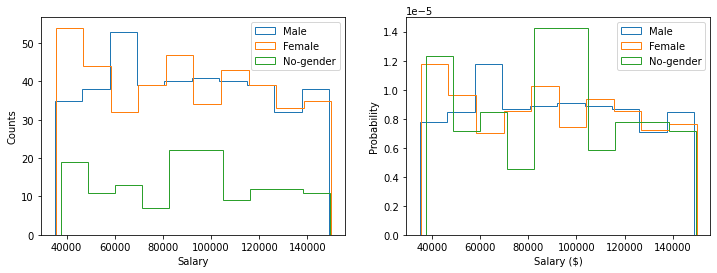

In [138]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(12,4))

for s in ['Male', 'Female', 'No-gender']:
    axs[0].hist( emp_df[ emp_df['Gender']==s ]['Salary'], histtype='step', 
                label=s, density=False)
    axs[0].set_ylabel('Counts')
    axs[0].set_xlabel('Salary')
    axs[0].legend()    
    

    axs[1].hist( emp_df[ emp_df['Gender']==s ]['Salary'], histtype='step', 
                label=s, density=True)
    axs[1].set_ylabel('Probability')
    axs[1].set_xlabel('Salary ($)')
    axs[1].legend()    
    
    
plt.show()


In [139]:

    
# task 2    
salary_per_month = emp_df["Salary"] / 12
emp_df["Salary per month"] = salary_per_month
# emp_df
# ---
    
# task 3
print("Mean salary per month:", round(emp_df["Salary per month"].mean(), 2))
print("Standard Deviation:", round(emp_df["Salary per month"].std(), 2))
emp_df.describe()
# ---
    
# task 4
# Create some masks to filter the data
females_mask = (emp_df["Gender"] == "Female")
salary_mask = (emp_df["Salary per month"] >= 5000) & (emp_df["Salary per month"] <= 10_000)

# Make a new dataframe
fem_emp_df = emp_df[females_mask & salary_mask]
# fem_emp_df
# ---
                                                                                          
# task 5
fem_emp_df.describe()


Mean salary per month: 7524.07
Standard Deviation: 2734.25


,Salary,Bonus %,Salary per month
count,202.000000,202.000000,202.000000
mean,91424.658416,9.671559,7618.721535
std,16761.435155,5.787173,1396.786263
min,60003.000000,1.079000,5000.250000
25%,76179.750000,4.223250,6348.312500
50%,90779.500000,8.728500,7564.958333
75%,106300.000000,14.518750,8858.333333
max,119266.000000,19.780000,9938.833333


In [ ]:
# EOF